In [1]:
#import the dependencies

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs


In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])
    
    

-36.521994262480234 2.3523753305550485
74.49281693507544 -141.04808178781275
-77.48218590675832 -5.449376587175863
-82.07614422844345 154.04178856859102
-37.53800399521905 -103.76505367808906
-71.14735245312691 -94.02641985526859
38.76275900210368 -12.136318984421138
15.46363102671188 -75.0711968699222
12.968376903748734 -161.9667638385302
-2.0275242038926677 24.629754613197036
45.60934479840168 -92.36788140347397
62.85923899775389 -167.29542439033327
70.34983451525281 -66.82746464923544
10.98352492183217 -154.49697630782583
-36.18032913337854 177.6795257283403
74.78817250543989 -71.43720232836847
-63.31837535571427 80.69518571592738
81.63410300172782 -141.76474133643
-57.68047368182933 103.89991214248772
32.62296887427944 -121.19757779906817
-71.29068193175655 -56.70124500436859
1.97455992769261 -23.301335902735957
-61.657542421019855 27.760224135466245
15.718322850854605 60.76367732908494
79.85483740359871 136.6522035993019
-46.12399528062991 -91.71679364294725
70.42131415566593 179.

In [5]:
from citipy import citipy

In [23]:
#create a listi for holding cities

cities=[]

#identify the nearest city for each latitude and longitude combination

for coordinate in coordinates:
    city=citipy.nearest_city(coordinate[0] , coordinate[1]).city_name
    
    #if the city is unique , then we will add it to the cities list.
    
    if city not in cities:
        cities.append(city)
        
#print the city count to confirm sufficient count.

len(cities)

658

In [24]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [26]:
# Import the time library and the datetime module from the datetime library
import time
from datetime import datetime

In [10]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | saldanha
Processing Record 2 of Set 1 | aklavik
Processing Record 3 of Set 1 | hermanus
Processing Record 4 of Set 1 | bluff
Processing Record 5 of Set 1 | lebu
Processing Record 6 of Set 1 | punta arenas
Processing Record 7 of Set 1 | colares
Processing Record 8 of Set 1 | morant bay
Processing Record 9 of Set 1 | makakilo city
Processing Record 10 of Set 1 | kindu
Processing Record 11 of Set 1 | north branch
Processing Record 12 of Set 1 | nome
Processing Record 13 of Set 1 | clyde river
Processing Record 14 of Set 1 | hilo
Processing Record 15 of Set 1 | ruatoria
City not found. Skipping...
Processing Record 16 of Set 1 | qaanaaq
Processing Record 17 of Set 1 | busselton
Processing Record 18 of Set 1 | tuktoyaktuk
Processing Record 19 of Set 1 | lompoc
Processing Record 20 of Set 1 | ushuaia
Processing Record 21 of Set 1 | goderich
Processing Record 22 of Set 1 | kruisfontein
Processing Record

Processing Record 37 of Set 4 | avila
Processing Record 38 of Set 4 | lorengau
Processing Record 39 of Set 4 | show low
Processing Record 40 of Set 4 | taolanaro
City not found. Skipping...
Processing Record 41 of Set 4 | portland
Processing Record 42 of Set 4 | toora-khem
Processing Record 43 of Set 4 | airai
Processing Record 44 of Set 4 | san jeronimo
Processing Record 45 of Set 4 | evensk
Processing Record 46 of Set 4 | aztec
Processing Record 47 of Set 4 | iisaku
Processing Record 48 of Set 4 | wuwei
Processing Record 49 of Set 4 | rundu
Processing Record 50 of Set 4 | sambava
Processing Record 1 of Set 5 | coahuayana
Processing Record 2 of Set 5 | vila franca do campo
Processing Record 3 of Set 5 | port-gentil
Processing Record 4 of Set 5 | pangnirtung
Processing Record 5 of Set 5 | heze
Processing Record 6 of Set 5 | sitka
Processing Record 7 of Set 5 | hirara
Processing Record 8 of Set 5 | dapaong
Processing Record 9 of Set 5 | luau
Processing Record 10 of Set 5 | bredasdorp
Pr

Processing Record 22 of Set 8 | sri aman
Processing Record 23 of Set 8 | nalut
Processing Record 24 of Set 8 | thompson
Processing Record 25 of Set 8 | mangochi
Processing Record 26 of Set 8 | burica
City not found. Skipping...
Processing Record 27 of Set 8 | qaqortoq
Processing Record 28 of Set 8 | mogzon
Processing Record 29 of Set 8 | east london
Processing Record 30 of Set 8 | port augusta
Processing Record 31 of Set 8 | desbiens
Processing Record 32 of Set 8 | merrill
Processing Record 33 of Set 8 | praia da vitoria
Processing Record 34 of Set 8 | dangriga
Processing Record 35 of Set 8 | coroata
Processing Record 36 of Set 8 | saint-joseph
Processing Record 37 of Set 8 | palmer
Processing Record 38 of Set 8 | chavakkad
Processing Record 39 of Set 8 | bargal
City not found. Skipping...
Processing Record 40 of Set 8 | udachnyy
Processing Record 41 of Set 8 | tumannyy
City not found. Skipping...
Processing Record 42 of Set 8 | kenai
Processing Record 43 of Set 8 | samarai
Processing 

Processing Record 7 of Set 12 | arlit
Processing Record 8 of Set 12 | dickinson
Processing Record 9 of Set 12 | safaga
Processing Record 10 of Set 12 | pingdingshan
Processing Record 11 of Set 12 | atakpame
Processing Record 12 of Set 12 | dunedin
Processing Record 13 of Set 12 | boa vista
Processing Record 14 of Set 12 | vestmannaeyjar
Processing Record 15 of Set 12 | shchelyayur
City not found. Skipping...
Processing Record 16 of Set 12 | waddan
Processing Record 17 of Set 12 | maunabo
Processing Record 18 of Set 12 | port-cartier
Processing Record 19 of Set 12 | vaitape
Processing Record 20 of Set 12 | stykkisholmur
Processing Record 21 of Set 12 | waupun
Processing Record 22 of Set 12 | asheville
Processing Record 23 of Set 12 | paamiut
Processing Record 24 of Set 12 | boralday
Processing Record 25 of Set 12 | banting
Processing Record 26 of Set 12 | phangnga
Processing Record 27 of Set 12 | matagami
Processing Record 28 of Set 12 | penzance
Processing Record 29 of Set 12 | pousat


In [27]:
len(city_data)

594

In [28]:
#convert the array of dictionaries to a pandas Dataframe

city_data_df=pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Saldanha,-33.0117,17.9442,75.25,70,88,13.11,ZA,2023-01-12 09:36:44
1,Aklavik,68.2191,-135.0107,-20.42,97,98,3.31,CA,2023-01-12 09:36:45
2,Hermanus,-34.4187,19.2345,81.81,65,67,26.57,ZA,2023-01-12 09:36:45
3,Bluff,-46.6000,168.3333,53.82,74,27,8.10,NZ,2023-01-12 09:29:44
4,Lebu,-37.6167,-73.6500,51.71,87,1,16.37,CL,2023-01-12 09:28:34
5,Punta Arenas,-53.1500,-70.9167,44.71,81,0,5.75,CL,2023-01-12 09:29:53
6,Colares,38.7992,-9.4469,57.33,77,0,15.01,PT,2023-01-12 09:36:46
7,Morant Bay,17.8815,-76.4093,76.62,83,19,11.23,JM,2023-01-12 09:34:54
8,Makakilo City,21.3469,-158.0858,71.92,65,0,8.05,US,2023-01-12 09:36:47
9,Kindu,-2.9500,25.9500,68.25,96,100,3.00,CD,2023-01-12 09:36:47


In [29]:
new_column_order = ["City","Country","Date","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed"]
city_data_df=pd.DataFrame(city_data)[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Saldanha,ZA,2023-01-12 09:36:44,-33.0117,17.9442,75.25,70,88,13.11
1,Aklavik,CA,2023-01-12 09:36:45,68.2191,-135.0107,-20.42,97,98,3.31
2,Hermanus,ZA,2023-01-12 09:36:45,-34.4187,19.2345,81.81,65,67,26.57
3,Bluff,NZ,2023-01-12 09:29:44,-46.6000,168.3333,53.82,74,27,8.10
4,Lebu,CL,2023-01-12 09:28:34,-37.6167,-73.6500,51.71,87,1,16.37
5,Punta Arenas,CL,2023-01-12 09:29:53,-53.1500,-70.9167,44.71,81,0,5.75
6,Colares,PT,2023-01-12 09:36:46,38.7992,-9.4469,57.33,77,0,15.01
7,Morant Bay,JM,2023-01-12 09:34:54,17.8815,-76.4093,76.62,83,19,11.23
8,Makakilo City,US,2023-01-12 09:36:47,21.3469,-158.0858,71.92,65,0,8.05
9,Kindu,CD,2023-01-12 09:36:47,-2.9500,25.9500,68.25,96,100,3.00


In [35]:
# Create the output file (CSV).
output_data_file = "weather_data.csv"


In [36]:
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [37]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

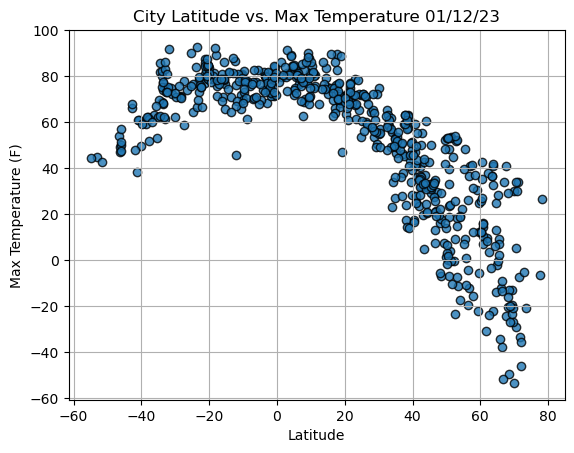

In [47]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_dataFig1.png")

# Show plot.
plt.show()

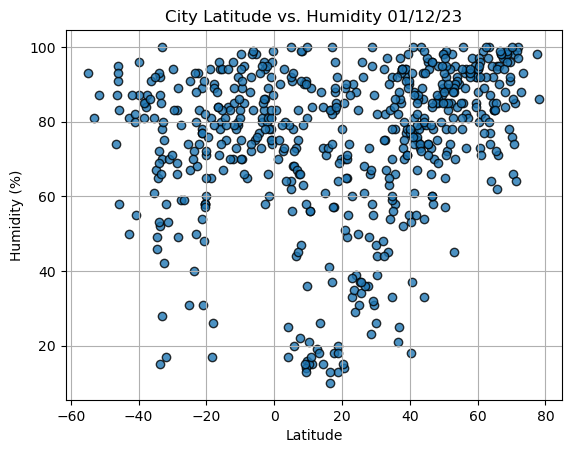

In [46]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_dataFig2.png")
# Show plot.
plt.show()

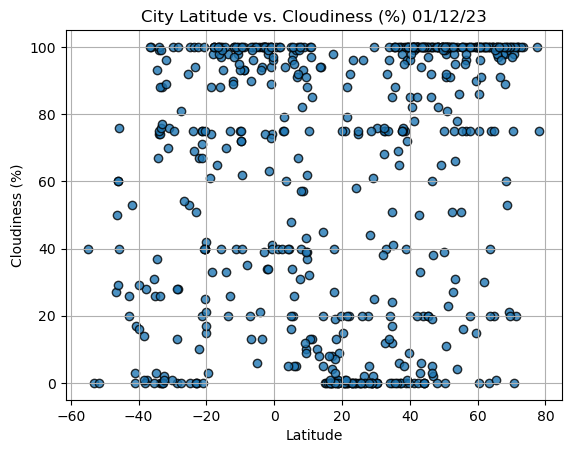

In [48]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_dataFig3.png")
# Show plot.
plt.show()


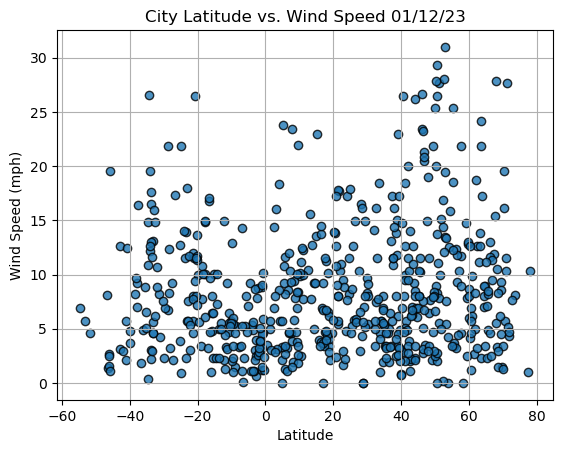

In [49]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_dataFig4.png")
# Show plot.
plt.show()

In [50]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [52]:
index13 = city_data_df.loc[13]
index13

City                         Hilo
Country                        US
Date          2023-01-12 09:30:57
Lat                       19.7297
Lng                       -155.09
Max Temp                    71.28
Humidity                       70
Cloudiness                     20
Wind Speed                   4.61
Name: 13, dtype: object

In [54]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
1,Aklavik,CA,2023-01-12 09:36:45,68.2191,-135.0107,-20.42,97,98,3.31
6,Colares,PT,2023-01-12 09:36:46,38.7992,-9.4469,57.33,77,0,15.01
7,Morant Bay,JM,2023-01-12 09:34:54,17.8815,-76.4093,76.62,83,19,11.23
8,Makakilo City,US,2023-01-12 09:36:47,21.3469,-158.0858,71.92,65,0,8.05
10,North Branch,US,2023-01-12 09:36:47,45.5113,-92.9802,29.08,96,97,10.25


In [55]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

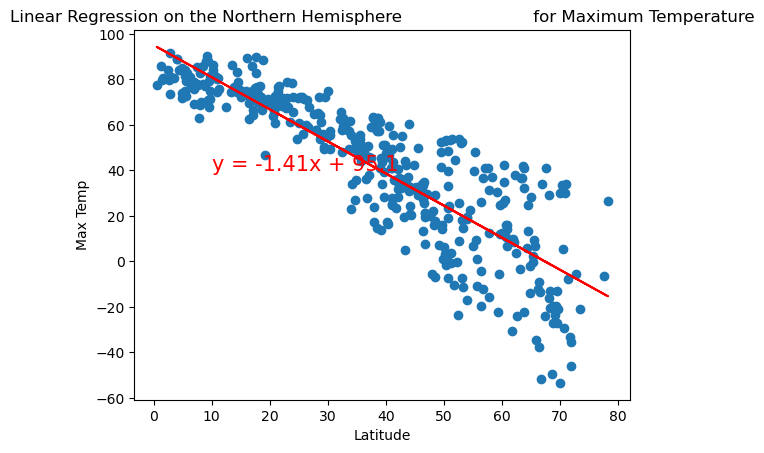

In [56]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

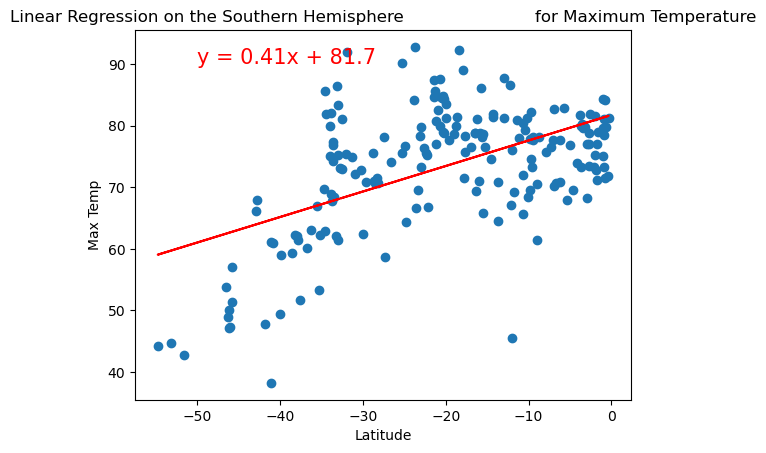

In [57]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(-50,90))

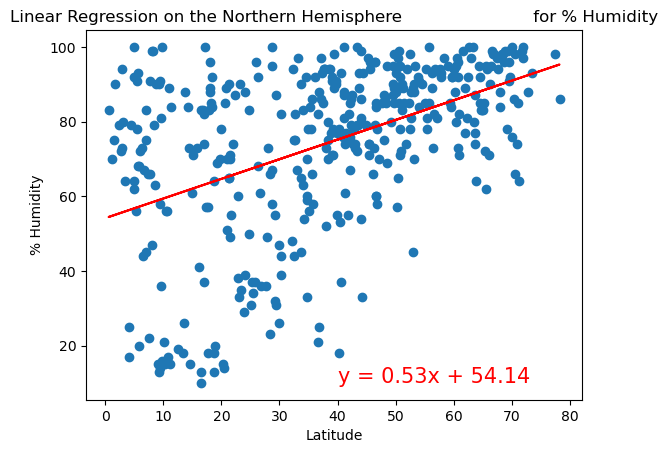

In [58]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Humidity', '% Humidity',(40,10))

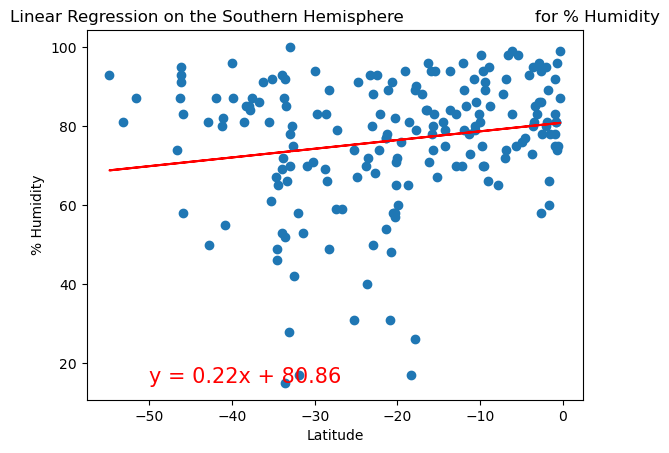

In [59]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Humidity', '% Humidity',(-50,15))

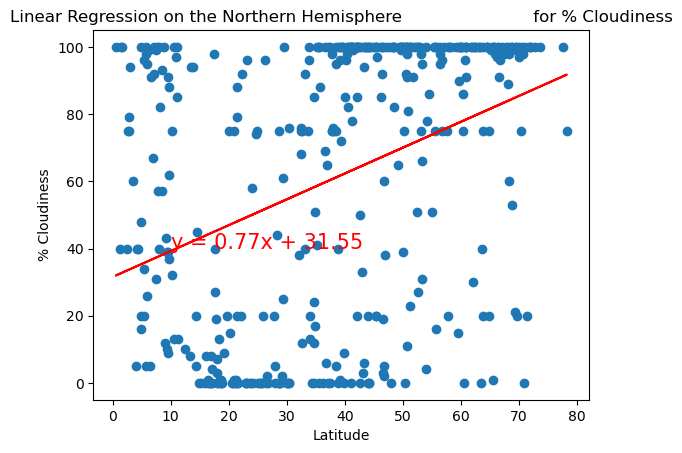

In [64]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(10,40))

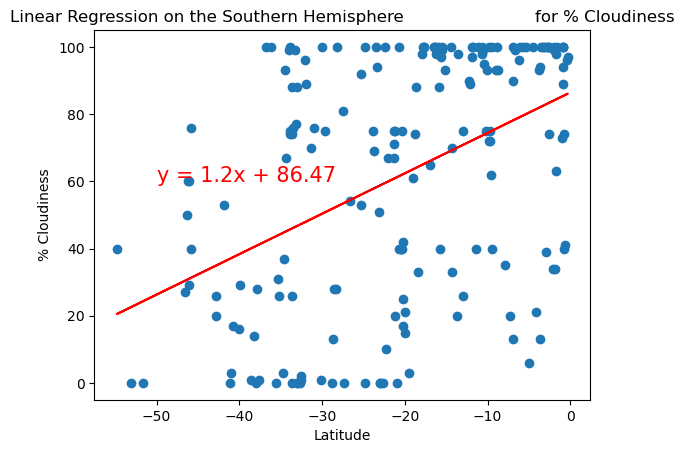

In [65]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for % Cloudiness', '% Cloudiness',(-50,60))

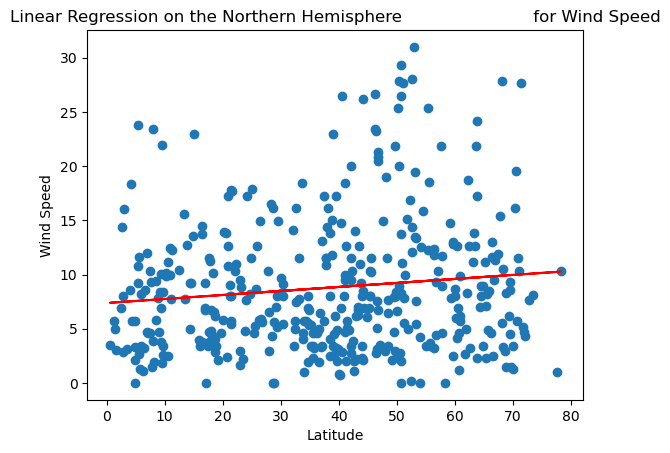

In [66]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Wind Speed', 'Wind Speed',(40,35))

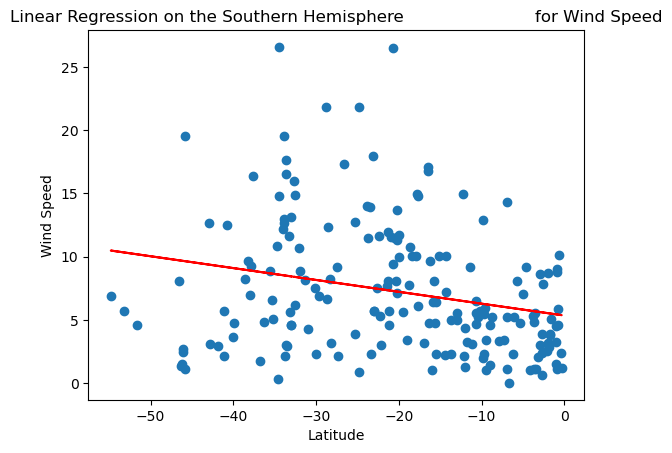

In [72]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]



# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \
                        for Wind Speed', 'Wind Speed',(-50,35))